# Exploratory Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [2]:
# Load the Parquet file into a Pandas DataFrame
df = pd.read_parquet("all_car_details.parquet")
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 decimal places

# 1. Basic Information

# Print the first few rows of the DataFrame
print("First 5 rows:\n", df.head())

# Print the shape of the DataFrame (number of rows and columns)
print("\nShape of DataFrame:", df.shape)

# Print the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Print summary statistics for numerical columns
# print("\nSummary statistics for numerical columns:\n", df.describe())

First 5 rows:
                                                  url         make  \
0  https://www.autoscout24.com/offers/acm-biagini...          acm   
1  https://www.autoscout24.com/offers/acm-4-wd-el...          acm   
2  https://www.autoscout24.com/offers/acm-biagini...          acm   
3  https://www.autoscout24.com/offers/acm-others-...          acm   
4  https://www.autoscout24.com/offers/ariel-motor...  ariel-motor   

           car_title       price          seller       location  num_images  \
0  ACM Biagini Passo     4555.00  Private seller   Lokeren , BE         NaN   
1           ACM 4 WD 10000001.00  Private seller     Munich, DE        3.00   
2  ACM Biagini Passo     3500.00  Private seller   Valencia, ES       10.00   
3                ACM    17000.00  Private seller  Bonndorf , DE       14.00   
4   Ariel Motor Atom   100000.00  Private seller     ancona, IT       16.00   

       body_type          used_type drivetrain  ... electric_range  \
0    Convertible         

In [9]:
# print(df["comfort_and_convenience"][10])
ferraris_df = df[df['make'] == 'ferrari']
print(len(ferraris_df))

4290



Missing values in each column:
 url                             0
make                            0
car_title                     189
price                         189
seller                       6730
location                      189
num_images                   6127
body_type                     195
used_type                     189
drivetrain                 155046
seats                       36330
doors                       15704
country_version            297308
model_code                 390436
mileage                      9146
first_registration          30034
general_inspection         286187
previous_owner             281595
full_service_history       287991
non_smoker_service         505804
power                         957
gearbox                     11086
engine_size                 73815
gears                      188237
cylinders                  143399
empty_weight               144041
fuel_type                    1284
fuel_consumption           319243
emission_class 

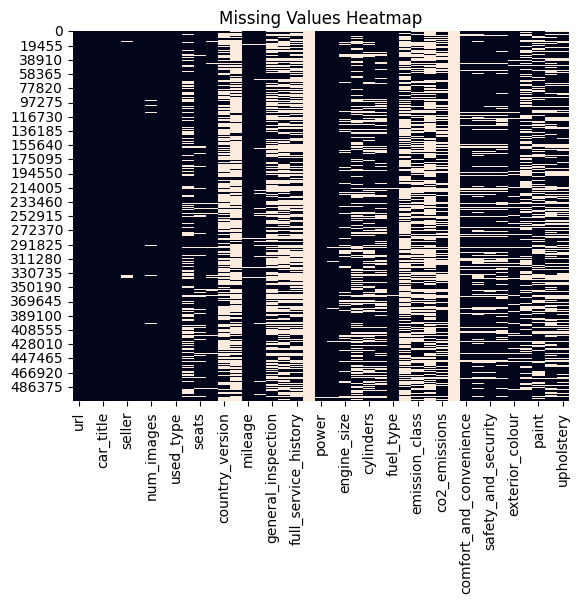

In [6]:
# 2. Missing Values

# Check for missing values in each column
print("\nMissing values in each column:\n", df.isnull().sum())

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


Value counts for 'Make':
 make
mercedes-benz     31259
ford              27814
audi              27676
volkswagen        26311
renault           21133
                  ...  
cityel                1
lifan                 1
de-la-chapelle        1
mobilize              1
stormborn             1
Name: count, Length: 230, dtype: int64


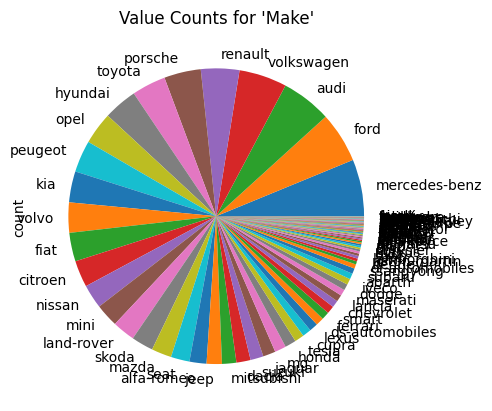

In [13]:
# 3. Value Counts for Categorical Columns

# Print value counts for categorical columns (example: 'Make')
print("\nValue counts for 'Make':\n", df['make'].value_counts())

# Visualize value counts for a categorical column (example: 'Make')
df['make'].value_counts()[:100].plot(kind='pie')
plt.title("Value Counts for 'Make'")
plt.show()

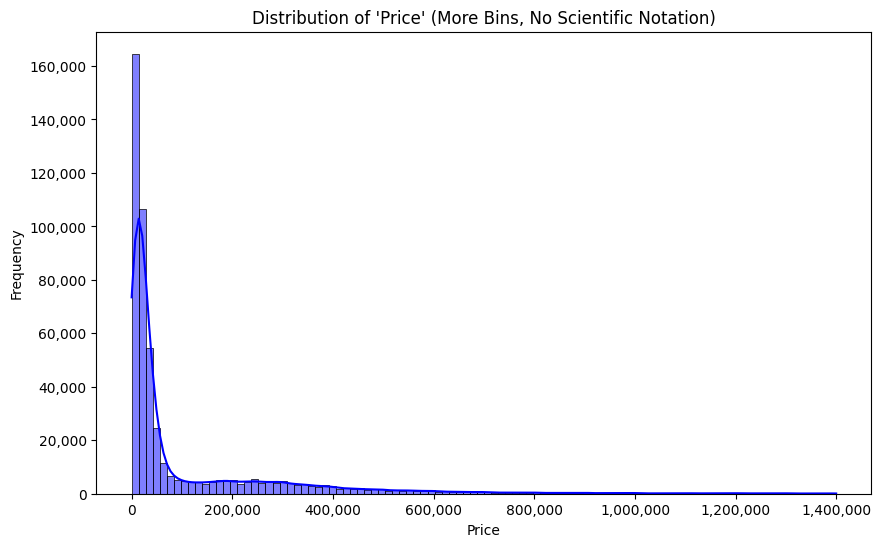

In [ ]:
# 4. Distributions of Numerical Columns
threshold = df['price'].quantile(0.99)  # 99th percentile
df_filtered = df[df['price'] <= threshold]

# Plot histograms for numerical columns (example: 'Price')
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'], bins=100, kde=True, color='blue')  # Increased bins to 100
plt.title("Distribution of 'Price'")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [ ]:
# 4. Distributions of Numerical Columns
threshold = df['price'].quantile(0.99)  # 99th percentile
df_filtered = df[df['price'] <= threshold]

# Plot histograms for numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['mileage'], bins=100, kde=True, color='blue')  # Increased bins to 100
plt.title("Distribution of 'Mileage'")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()